<h1 id="tocheading">基础概念</h1>
<div id="toc"></div>


## 协方差

+ [协方差 wikipedia](https://zh.wikipedia.org/wiki/协方差)
+ [如何通俗易懂地解释「协方差」与「相关系数」的概念](https://www.zhihu.com/question/20852004)

可以通俗的理解为：两个变量在变化过程中是同方向变化？还是反方向变化？同向或反向程度如何？

你变大，同时我也变大，说明两个变量是同向变化的，这时协方差就是正的。

你变大，同时我变小，说明两个变量是反向变化的，这时协方差就是负的。

从数值来看，协方差的数值越大，两个变量同向程度也就越大。反之亦然。

公式：

$Cov({\bf X, Y}) = {\bf E}[({\bf X} - \mu _x)({\bf Y} - \mu _y)]$

公式简单翻译一下是：如果有X,Y两个变量，每个时刻的“X值与其均值之差”乘以“Y值与其均值之差”得到一个乘积，再对这每时刻的乘积求和并求出均值（其实是求“期望”，但就不引申太多新概念了，简单认为就是求均值了）。

举个栗子：

比如有两个变量X,Y，观察t1-t7（7个时刻）他们的变化情况。

如图：分别用红点和绿点表示X、Y，横轴是时间。可以看到X，Y均围绕各自的均值运动，并且很明显是同向变化的。

$y1 = sin(x) + \mu _x$

$y2 = sin(x) + \mu _y$

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
ux= 5
uy =2

t = np.linspace(-np.pi, np.pi, 14)
y_0 = np.zeros_like(t)
y_x = np.zeros_like(t)
y_x.flat = ux

y_y = np.zeros_like(t)
y_y.flat = uy

f_x = np.sin(t) + ux

f_y = np.sin(t) + uy

f_y2 = -np.sin(t) + uy

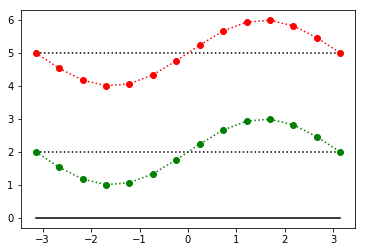

In [32]:
plt.plot(t, y_0, color ='black')

plt.plot(t, y_x, color ='black',linestyle ='dotted')
plt.plot(t, f_x, color = 'red', marker = 'o', linestyle ='dotted')

plt.plot(t, y_y, color ='black',linestyle ='dotted')
plt.plot(t, f_y, color = 'green', marker = 'o', linestyle ='dotted')

这时，我们发现每一时刻${\bf X} - \mu _x$ 的值与 ${\bf Y } - \mu _y$ 的值的“正负号”一定相同（如下图：比如t1时刻，他们同为正，t2时刻他们同为负）：

所以，像上图那样，当他们同向变化时，${\bf X} - \mu _x$与 ${\bf Y } - \mu _y$ 的乘积为正。这样，当你把t1-t7时刻${\bf X} - \mu _x$与 ${\bf Y } - \mu _y$的乘积加在一起，求平均后也就是正数了。



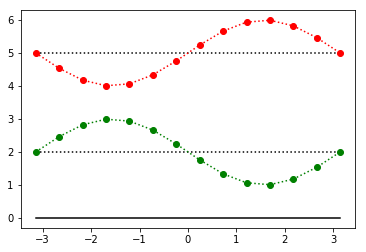

In [33]:
plt.plot(t, y_0, color ='black')

plt.plot(t, y_x, color ='black',linestyle ='dotted')
plt.plot(t, f_x, color = 'red', marker = 'o', linestyle ='dotted')

plt.plot(t, y_y, color ='black',linestyle ='dotted')
plt.plot(t, f_y2, color = 'green', marker = 'o', linestyle ='dotted')

如果反向运动呢？很明显，${\bf X} - \mu _x$ 的值与 ${\bf Y } - \mu _y$的值的“正负号”一定相反，于是${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积就是负值了。这样当你把t1-t7时刻 ${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积加在一起，求平均的时候也就是负数了。当然上面说的是两种特殊情况，很多时候X，Y的运动是不规律的，比如：

这时，很可能某一时刻${\bf X} - \mu _x$ 的值与 ${\bf Y } - \mu _y$的值乘积为正，另外一个时刻${\bf X} - \mu _x$ 的值与 ${\bf Y } - \mu _y$的值乘积为负

将每一时刻${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积加在一起，其中的正负项就会抵消掉，最后求平均得出的值就是协方差，通过协方差的数值大小，就可以判断这两个变量同向或反向的程度了。

__总结一下，如果协方差为正，说明X，Y同向变化，协方差越大说明同向程度越高；如果协方差为负，说明X，Y反向运动，协方差越小说明反向程度越高。__

那如果X，Y同向变化，但X大于均值，Y小于均值，那${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积为负值啊？这不是矛盾了吗？这种情况是有可能出现的，比如：

可以看到，t1时刻，${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的符号相反，他们的乘积为负值。但是，总体看，这两个变量的协方差仍然是正的，因为你还要计算t2，t3……t7时刻${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积，然后再把这7个时刻的乘积求和做均值，才是最后X，Y的协方差。1个负、6个正，显然最后协方差很大可能性是正的。

所以t1时刻${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积为负值，并不能说明他们反向运动，要结合整体的情况来判断。

那么你可能又要问了，既然都是同向变化，那t1时刻${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积为负值、其他时刻乘积为正的这种情况，与，t1-t7时刻${\bf X} - \mu _x$ 与 ${\bf Y } - \mu _y$的乘积均为正值的情况，到底有什么差异呢？这点其实前面也解释过了，差异就是：第一种情况的同向程度不如第二种情况的同向程度大（第一种情况6正1负，第二种情况7正，所以第一种情况的协方差小于第二种情况的协方差，第一种情况X，Y变化的同向程度要小于第二种情况）。

In [34]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>